### Imports Usados

In [764]:
import math
import numpy as np
from scipy.linalg import ldl, cholesky
import matplotlib.pyplot as plt

### Constantes e Condições Iniciais

In [765]:
k = 2.5
h = 0.2
const = k/h**2
Tbegin = 60
Tend = 40
t0 = 50.0

### Cáculo de N

In [766]:
N = 1/h -1

# verifica se N pertence aos inteiros
if N != int(N):
    print("N não é inteiro")
else:
    N = int(N)
    print("N = ", N)

N =  4


### Constroi as matrizes utilizadas

In [767]:
D2 = np.zeros((N, N))
BC = np.zeros(N)

In [768]:
BC[0] = Tbegin
BC[N-1] = Tend

print('BC = ')
for i in range(N):
    print('|{:.2f}|'.format(BC[i]))

BC = 
|60.00|
|0.00|
|0.00|
|40.00|


In [769]:
for i in range(N):
    D2[i][i] = -2
    if i > 0:
        D2[i][i-1] = 1
    if i < N-1:
        D2[i][i+1] = 1

print('D2 = ')
print(D2)

D2 = 
[[-2.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]


### Plotagem das temperaturas em função do tempo

In [770]:
def plot_line(array_data, step, special=False):
    plt.figure(figsize=(12, 6))
    counter = 0
    for data in array_data:
        if (counter == 0 or counter == (len(array_data) -1)) and special:
            plt.plot([i*step for i in range(len(data))], data, linestyle='--')
        else:
            plt.plot([i*step for i in range(len(data))], data, linestyle='-')
        counter += 1
    plt.ylabel('Temperatura (°C)')
    plt.xlabel('Tempo (s)')
    plt.yticks(array_data.T[len(array_data.T) -1])
    #plt.xticks([i*step for i in range(len(data))])
    #plt.xlim(0, 0.05)
    plt.grid(True)
    plt.show()

def plot_line_2(data, step, special=False):
    plt.figure(figsize=(12, 6))
    plt.plot([i*step for i in range(len(data))], data, linestyle='--')
    plt.ylabel('Temperatura (°C)')
    plt.xlabel('Tempo (s)')
    #plt.yticks()
    #plt.xlim(0, 0.05)
    plt.grid(True)
    plt.show()


def plot_line_3(array_data, step):
    plt.figure(figsize=(12, 6))
    counter = 0
    for data in array_data:
        if (counter == 1):
            plt.plot([i*step for i in range(len(data))], data, linestyle='--', label='T_real'.format(counter))
        else:
            plt.plot([i*step for i in range(len(data))], data, linestyle='-', label='T_aproximate'.format(counter))
        counter += 1
    plt.ylabel('Temperatura (°C)')
    plt.xlabel('Tempo (s)')
    #plt.yticks(array_data.T[len(array_data.T) -1])
    #plt.xticks([i*step for i in range(len(data))])
    #plt.xlim(0, 0.05)
    plt.legend()
    plt.grid(True)
    plt.show()

In [771]:
def plot_grid(array_data, step):
    # Dados
    temperaturas = array_data.T
    len_y = len(array_data[0])
    len_x = len(temperaturas[0])
    
    # Ajuste dos valores de x para que cada bloco seja simétrico
    x_barra = [i * step for i in range(len_x)]
    
    norm = plt.Normalize(vmin=temperaturas.min(), vmax=temperaturas.max())
    colors = plt.cm.Reds(norm(temperaturas))

    plt.figure(figsize=(12, 8))

    for t in range(len_y - 1):
        for i in range(len_x):
            # Ajustando a posição para preencher ambos os lados do bloco
            x_left = 45*(x_barra[i] - step/2)
            x_right =45*(x_barra[i] + step/2)
            plt.fill_between([x_left, x_right], t * step, (t + 1) * step, color=colors[t, i], alpha=1)

            # Colocando os valores das temperaturas no gráfico
            '''offset = 0
            if i == 0 or i == len_x -1:
                offset = 0.02
            plt.text(x_barra[i] * 95 + offset, (t + 0.5) * step, f'{temperaturas[t, i]:.1f}',
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=10, color='black')'''

    # Ajustando os limites dos eixos
    plt.xlim(0, 1)
    plt.ylim(0, (len_y-1) * step)  # Ajustando a altura do gráfico para acomodar o tempo
    #plt.xticks([i * step for i in range(len_x + 1)])
    plt.xlabel('Distância')
    plt.ylabel('Tempo (s)')

    # Exibindo o gráfico
    plt.show()

### Função T'

In [772]:
def function(t):
    return const * (D2 @ t + BC)

### Método de Euler

In [773]:
def euler_step(t, step):
    return t + step * function(t)

### Método de Runge Kutta

In [774]:
def runge_kutta_step(t, step):
    k1 = step * function(t)
    k2 = step * function(t + 0.5 * k1)
    k3 = step * function(t + 0.5 * k2)
    k4 = step * function(t + k3)
    return t + (k1 + 2*k2 + 2*k3 + k4) / 6

### Resolve o Sistema Utilizando os Métodos

In [775]:
def solver(t, t_end, dt, step_method):
    time_steps = int(t_end/dt) + 2
    T_history = np.zeros((time_steps, N))

    for i in range(time_steps): 
        T_history[i] = t
        t = step_method(t, dt)

    return T_history.T

def solver_with_increment(t, t_end, dt, step_method, time_increment):
    time_steps = int(t_end / dt)
    T_history = np.zeros((time_steps, N))
    T_begin_history = np.zeros(time_steps)
    
    for i in range(time_steps):
        if i % time_increment == 0 and i != 0:
            BC[0] += 5
        T_begin_history[i] = BC[0]
        T_history[i] = t #np.concatenate(([BC[0]], t, [BC[N-1]]))
        t = step_method(t, dt)

    return T_history.T, T_begin_history

### Escolhendo o passo de tempo

In [776]:
min_step = 1/max(np.linalg.eig(abs(const*D2))[0])
time_simulation = 0.05

step = min_step
if time_simulation/min_step > 1000:
    print("Quantidade maxima de steps excedidas!")
    step = time_simulation/1000

print("Passo de tempo escolhido:", step)

Passo de tempo escolhido: 0.0044222912360003365


### Solução do sistema com os métodos de Euler e Runge Kutta

In [777]:
#result_euler = solver(np.full(N, t0, dtype=float), time_simulation, step, euler_step)
result_runge = solver(np.full(N, t0, dtype=float), time_simulation, step, runge_kutta_step)

#result_euler = np.concatenate([np.full((1, result_euler.shape[1]), 60), result_euler, np.full((1, result_euler.shape[1]), 40)], axis=0)
result_runge = np.concatenate([np.full((1, result_runge.shape[1]), 60), result_runge, np.full((1, result_runge.shape[1]), 40)], axis=0)

In [778]:
'''plot_line(result_euler, step, True)
plot_grid(result_euler, step)'''

'plot_line(result_euler, step, True)\nplot_grid(result_euler, step)'

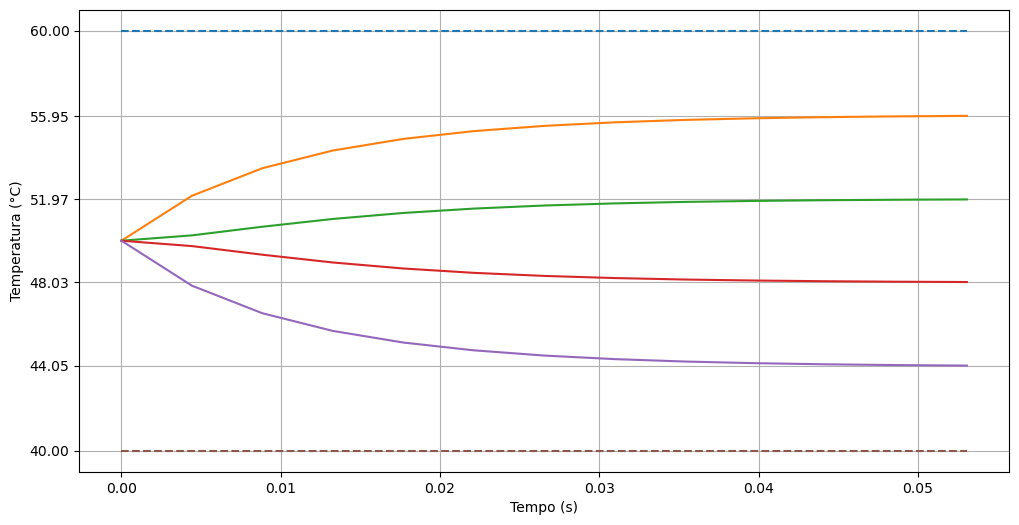

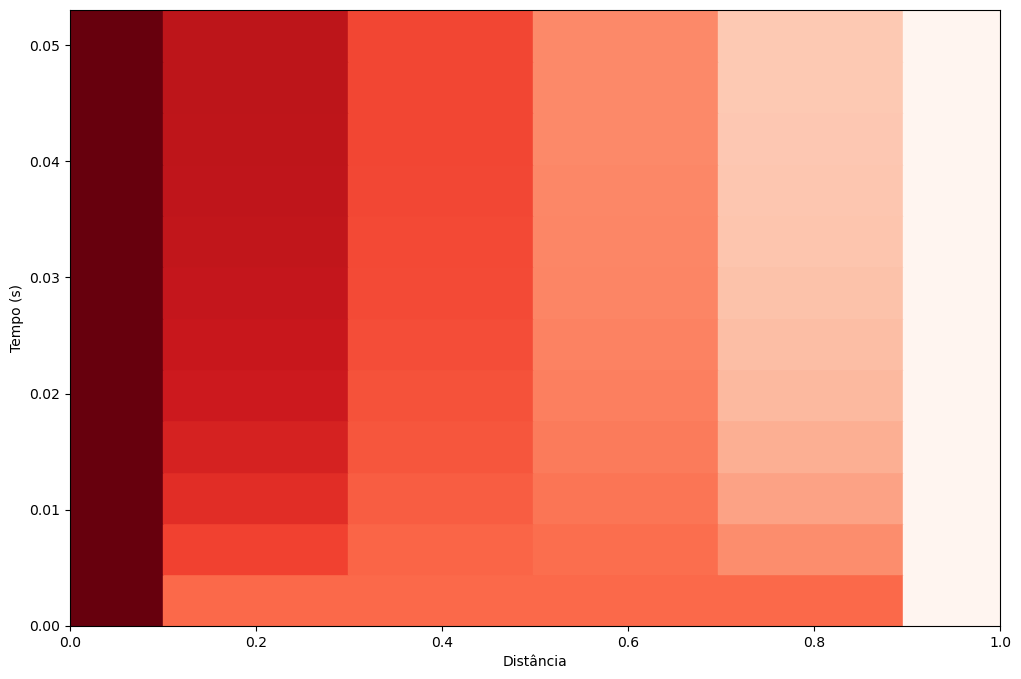

In [779]:
plot_line(result_runge, step, True)
plot_grid(result_runge, step)

### Solução do sistema com os métodos de Euler e Runge Kutta e incremento em Tbegin

### Escolhendo o passo de tempo

In [780]:
time_simulation = 2
step = time_simulation/1000

print("Passo de tempo escolhido:", step)

Passo de tempo escolhido: 0.002


In [781]:
result_euler_with_incr, T_begin_history = solver_with_increment(np.full(N, t0, dtype=np.float64), time_simulation, step, euler_step, 100)
BC[0] = 60
result_runge_with_incr, T_begin_history = solver_with_increment(np.full(N, t0, dtype=np.float64), time_simulation, step, runge_kutta_step, 100)


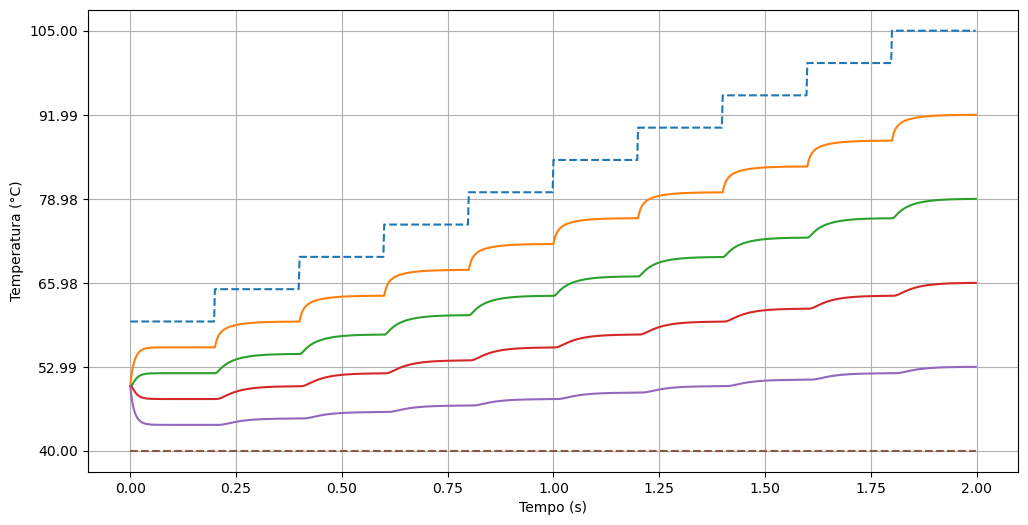

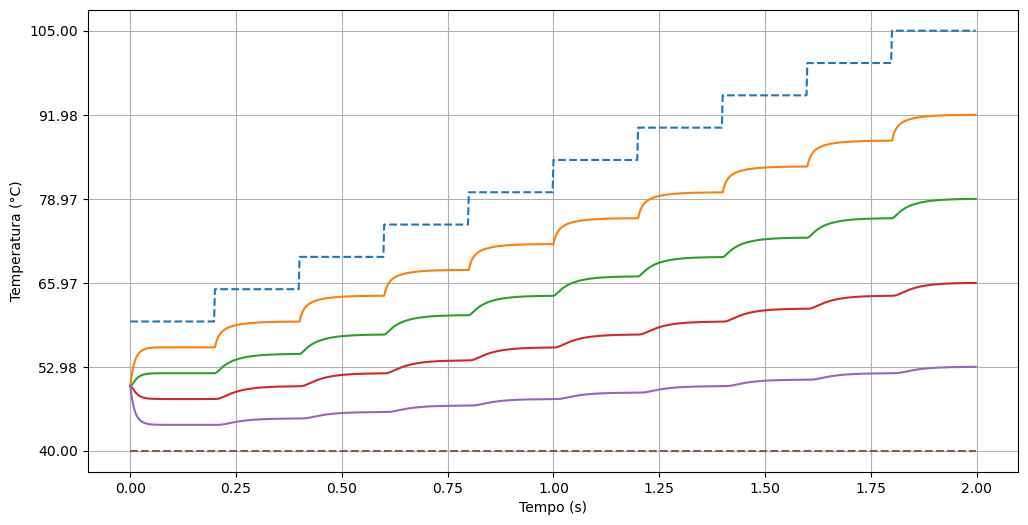

'plot_line_2(T_begin_history, step, False)'

In [782]:
result = np.concatenate([np.full((1, result_euler_with_incr.shape[1]), T_begin_history), result_euler_with_incr, np.full((1, result_euler_with_incr.shape[1]), 40)], axis=0)
plot_line(result, step, True)

result = np.concatenate([np.full((1, result_runge_with_incr.shape[1]), T_begin_history), result_runge_with_incr, np.full((1, result_runge_with_incr.shape[1]), 40)], axis=0)
plot_line(result, step, True)
'''plot_line_2(T_begin_history, step, False)'''
#plot_grid(result_euler_with_incr, step)

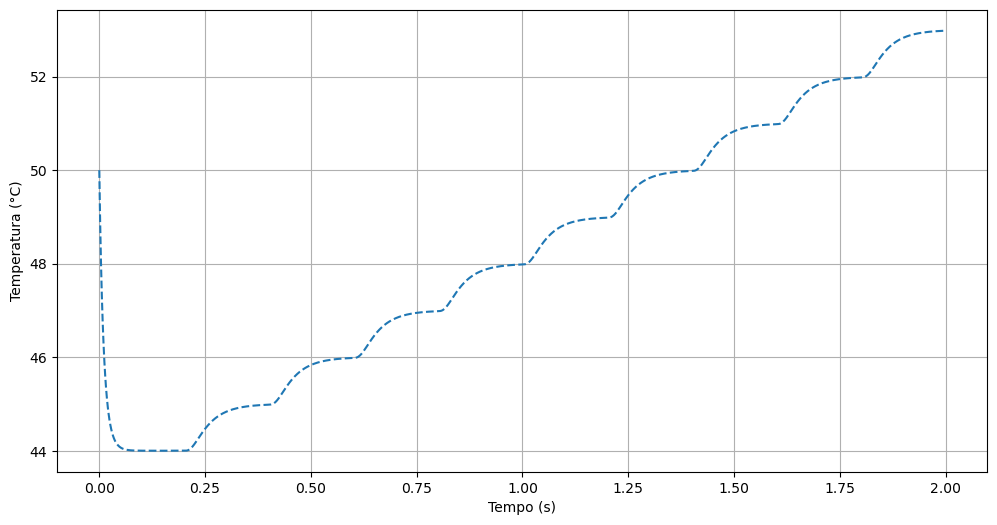

In [783]:
plot_line_2(result_runge_with_incr[-1], step, False)
#plot_grid(result_runge_with_incr, step)

### Questão 3

In [ ]:
def solver_linear(A, b):
    # Matriz regularizada A^T A + lambda I
    A_ = A.T @ A
    b_ = A.T @ b

    L = np.linalg.cholesky(A_)
    y = np.linalg.solve(L, b_)

    x = np.linalg.solve(L.T, y)
    
    return x

### matriz A e b

In [785]:
T = result_runge_with_incr.T
f = T[1:]

M = np.zeros((T.shape[0] -1, T.shape[1] +2))

for i in range(4):
    M[:,i] = result_runge_with_incr[i][:-1]
M[:, 4] = T_begin_history[:-1]
M[:, 5] = np.ones(T.shape[0] -1) * Tend

W = solver_linear(M, f)

a = W[:4]
b = W[4]
c = W[5]

print(a, b, c)

arr_response = np.zeros((999, 4))  
arr_response[0] = [50, 50, 50, 50]   
for k in range(998):
    for i in range(4):
        arr_response[k + 1][i] = np.dot(arr_response[k], a[i])
        arr_response[k + 1][i] += b[i] * T_begin_history[k]  
        #arr_response[k + 1][i] += c[i] * Tend  

#plot_line_3(arr_response, 0.002)

[[7.84932455e-01 9.78190105e-02 6.13403329e-03 2.44140652e-04]
 [9.78190096e-02 7.91066487e-01 9.80631509e-02 6.13403309e-03]
 [6.13403423e-03 9.80631514e-02 7.91066488e-01 9.78190106e-02]
 [2.44140099e-04 6.13403301e-03 9.78190104e-02 7.84932454e-01]] [1.10860189e-01 6.65283203e-03 2.64485663e-04 1.01725253e-05] [1.01726066e-05 2.64485714e-04 6.65283203e-03 1.10860189e-01]


[0.97331739 0.01534607]
0.9733173926669849 0.015346071375482495


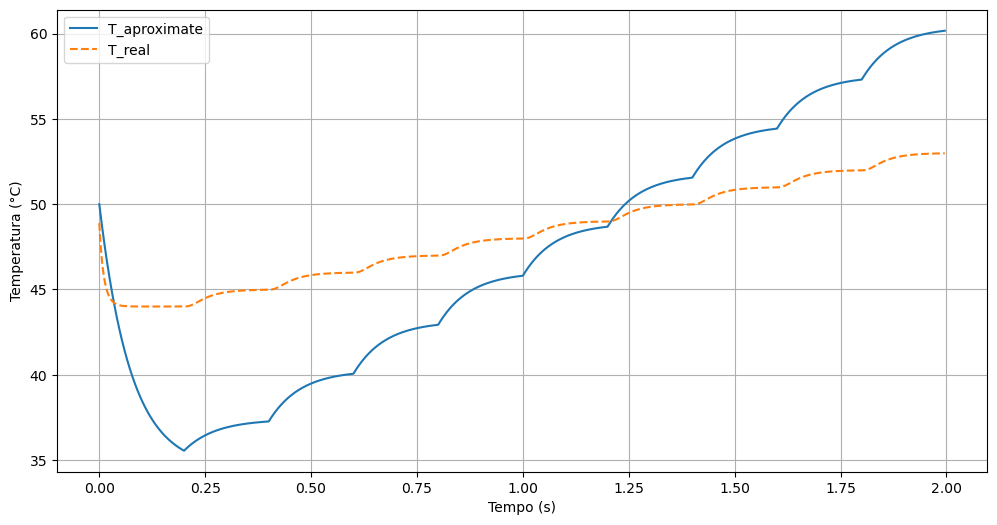

In [786]:
T = result_runge_with_incr[-1][:]

T_delay = T[1:]

X = np.zeros((len(T) -1, 2))
X[:, 0] = result_runge_with_incr[-1][:-1]
X[:, 1] = T_begin_history[1:]

#X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
#Tn_norm = (Tn - Tn.mean()) / Tn.std()
#W = np.linalg.pinv(X_norm.T @ X_norm + 0.4 * np.eye(5)) @ X_norm.T @ Tn_norm

W = np.linalg.pinv(X.T @ X + 773 * np.eye(2)) @ (X.T @ T_delay)

#W = solver_linear(X, Tn, 1, 5)

print(W)

a = W[0]
c = W[1]

arr = X @ W

print(a, c)

arr_response = np.zeros(999)
arr_response[0] = 50
for k in range(998):
    arr_response[k + 1] = arr_response[k] * a + c * T_begin_history[k]

# adiciona mais uma dimensao no array para plotar
arr_response = np.expand_dims(arr_response, axis=0)

# adiciona na segunda dimensao do array o array de temperaturas T_delay
arr_response = np.concatenate((arr_response, np.expand_dims(T_delay, axis=0)), axis=0)

plot_line_3(arr_response, 0.002)